In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [228]:
dfClean = pd.read_csv('data/compiledData/dfCleanMortes.csv')
# dfClean = pd.read_csv('dfCleanMortes.csv')
# dfClean['DATAHORA_REGISTRO_BO'] = pd.to_datetime(dfClean['DATAHORA_REGISTRO_BO'])
# dfClean['DATA_FATO'] = pd.to_datetime(dfClean['DATA_FATO'])
# dfClean['HORA_FATO_DT'] = pd.to_datetime(dfClean['HORA_FATO'],errors = 'coerce').dt.strftime('%H')


dfClean['ANO_BO'] = dfClean['ANO_BO'].astype(str)
dfClean['NUM_BO'] = dfClean['NUM_BO'].astype(str)


dfClean.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,...,DIA_FATO,DIA_SEMANA_FATO,LAT_LONG,RESPONSE_GEOLOCATOR,GEOLOCATOR_ADDRESS,GEOLOCATOR_NEIGHBORHOOD,GEOLOCATOR_POSTCODE,ZONE_FROM_POSTCODE,BO_ANO,NUM_VITIMAS_CRIME
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,10108,2019-01-01 07:56:59,3,2019,S.PAULO,08º D.P. BRAS,...,1,1,"-23.5462154481364,-46.631733309032","Rua Vinte e Cinco de Março, Sé, São Paulo, Reg...","{'road': 'Rua Vinte e Cinco de Março', 'suburb...",SÉ,01015-020,Centro,3-2019,1
1,DECAP,1ª SEC,São Paulo,001 DP - Sé,10101,2019-01-18 16:32:41,372,2019,S.PAULO,01º D.P. SE,...,18,4,"-23.5546896292896,-46.6296510483604","Vila Suíça, Sé, São Paulo, Região Imediata de ...","{'road': 'Vila Suíça', 'suburb': 'Sé', 'city':...",SÉ,01514-020,Centro,372-2019,1
2,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-20 00:15:18,534,2019,S.PAULO,78º D.P. JARDINS,...,19,5,"-23.560415289045,-46.6337071030673","Rua São Joaquim, Liberdade, São Paulo, Região ...","{'road': 'Rua São Joaquim', 'suburb': 'Liberda...",LIBERDADE,01511-001,Centro,534-2019,2
3,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-23 00:07:25,624,2019,S.PAULO,78º D.P. JARDINS,...,22,1,"-23.5629637062019,-46.6455014429631","1627, Avenida Brigadeiro Luís Antônio, Bela Vi...","{'house_number': '1627', 'road': 'Avenida Brig...",BELA VISTA,01318-002,Centro,624-2019,2
4,DECAP,2ª SEC,São Paulo,095 DP - Heliópolis,10358,2019-01-24 11:54:50,259,2019,S.PAULO,95º D.P. HELIÓPOLIS,...,24,3,"-23.6075347234928,-46.595687674394","Rua Cônego Xavier, Vila Heliópolis, Sacomã, Sã...","{'road': 'Rua Cônego Xavier', 'suburb': 'Vila ...",VILA HELIÓPOLIS,04232-000,Zona Sul,259-2019,1


# Analise Univariada

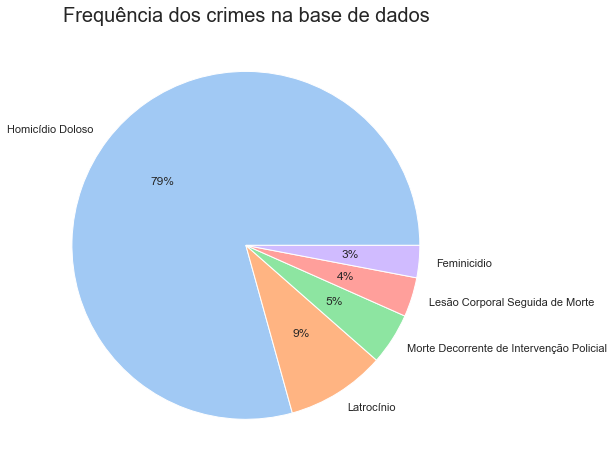

In [229]:
crime_counts = dfClean.CRIME.value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(crime_counts.keys())
y = list(crime_counts.values)

# sns.barplot(x=x, y=y, palette="GnBu_d")
plt.pie(y,labels=x,colors = sns.color_palette('pastel')[0:len(x)], autopct='%.0f%%')

plt.title("Frequência dos crimes na base de dados", fontdict = {'fontsize': 20})
plt.show()

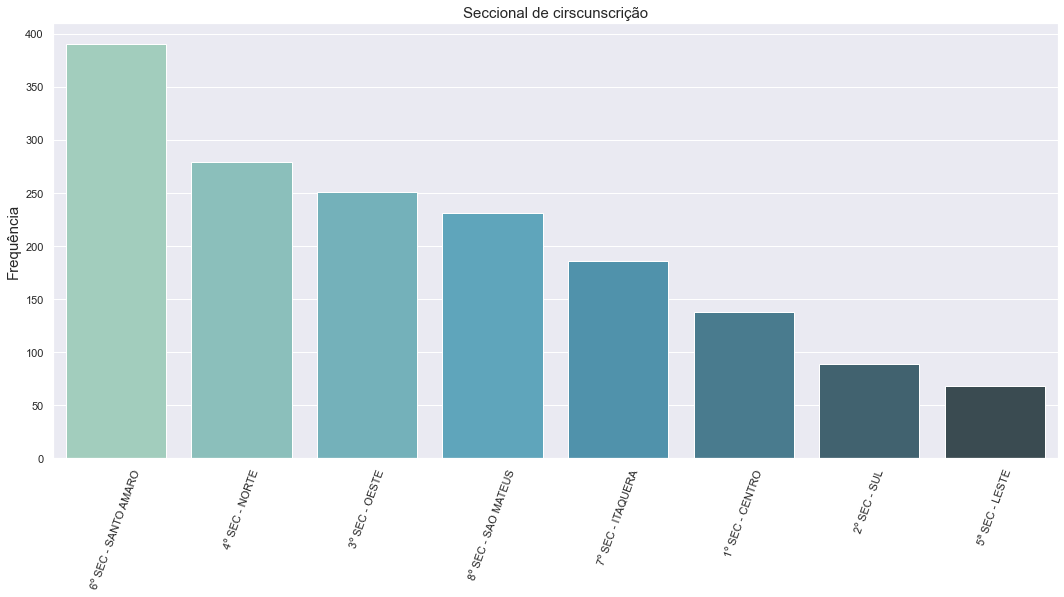

In [230]:
map_sec = {
    "1ª SEC" : "1º SEC - CENTRO",
    "DEL.SEC.1º CENTRO" : "1º SEC - CENTRO",
    "2ª SEC" : "2º SEC - SUL",
    "DEL.SEC.2º SUL" : "2º SEC - SUL",
    "3ª SEC" : "3º SEC - OESTE",
    "DEL.SEC.3º OESTE" : "3º SEC - OESTE",
    "4ª SEC" : "4º SEC - NORTE",
    "DEL.SEC.4º NORTE" : "4º SEC - NORTE",
    "5ª SEC" : "5ª SEC - LESTE",
    "DEL.SEC.5º LESTE " : "5º SEC - LESTE",
    "6ª SEC" : "6º SEC - SANTO AMARO",
    "DEL.SEC.6º SANTO AMARO" : "6º SEC - SANTO AMARO",
    "7ª SEC" : "7º SEC - ITAQUERA",
    "DEL.SEC.7º ITAQUERA" : "7º SEC - ITAQUERA",
    "8ª SEC" : "8º SEC - SAO MATEUS",
    "DEL.SEC.8º SAO MATEUS" : "8º SEC - SAO MATEUS"}

sec_counts = dfClean.SECCIONAL_CIRCUNSCRICAO.map(map_sec).value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(sec_counts.keys())
y = list(sec_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=70)
plt.title("Seccional de cirscunscrição", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

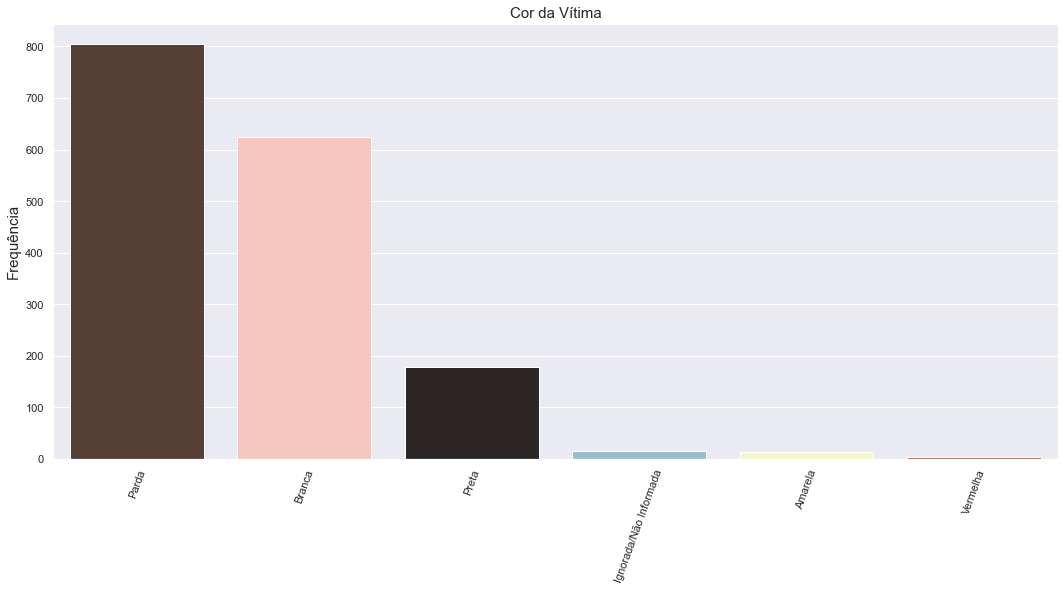

In [231]:
color_counts = dfClean.COR_PELE.str.strip().replace({'Ignorada':'Ignorada/Não Informada','Não informada':'Ignorada/Não Informada'}).value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(color_counts.keys())
y = list(color_counts.values)
sns.barplot(x=x, y=y, palette= sns.color_palette(['#5C3D2E','#FFC1B6','#2D2424','#8FC1D4','#FDFFBC','#B85C38']))
plt.xticks(rotation=70)
plt.title("Cor da Vítima", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

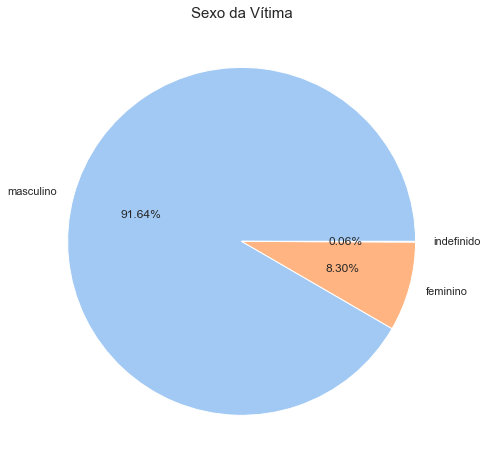

In [232]:
sex_counts = dfClean.SEXO_PESSOA.str.strip().str.lower().value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(sex_counts.keys())
y = list(sex_counts.values)
plt.pie(y,labels=x,colors = sns.color_palette('pastel')[0:len(x)], autopct='%.2f%%')
plt.xticks(rotation=70)
plt.title("Sexo da Vítima", fontdict = {'fontsize': 15})

plt.show()

In [233]:
sexo_pessoa = dfClean.groupby(['TIPO_PESSOA','SEXO_PESSOA']).size().reset_index()
sexo_pessoa

,TIPO_PESSOA,SEXO_PESSOA,0
0,VÍTIMA,Feminino,136
1,VÍTIMA,Indefinido,1
2,VÍTIMA,MASCULINO,5
3,VÍTIMA,Masculino,1496


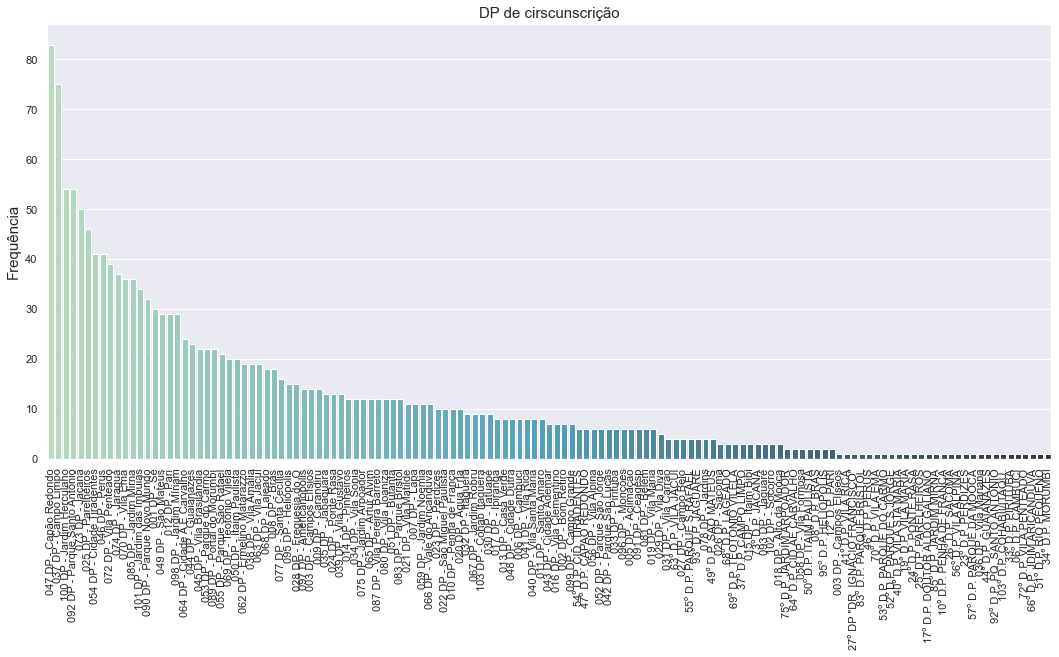

In [234]:
map_sec = {
    "1ª SEC" : "1º SEC - CENTRO",
    "DEL.SEC.1º CENTRO" : "1º SEC - CENTRO",
    "2ª SEC" : "2º SEC - SUL",
    "DEL.SEC.2º SUL" : "2º SEC - SUL",
    "3ª SEC" : "3º SEC - OESTE",
    "DEL.SEC.3º OESTE" : "3º SEC - OESTE",
    "4ª SEC" : "4º SEC - NORTE",
    "DEL.SEC.4º NORTE" : "4º SEC - NORTE",
    "5ª SEC" : "5ª SEC - LESTE",
    "DEL.SEC.5º LESTE " : "5º SEC - LESTE",
    "6ª SEC" : "6º SEC - SANTO AMARO",
    "DEL.SEC.6º SANTO AMARO" : "6º SEC - SANTO AMARO",
    "7ª SEC" : "7º SEC - ITAQUERA",
    "DEL.SEC.7º ITAQUERA" : "7º SEC - ITAQUERA",
    "8ª SEC" : "8º SEC - SAO MATEUS",
    "DEL.SEC.8º SAO MATEUS" : "8º SEC - SAO MATEUS"}

dp_counts = dfClean.DP_CIRCUNSCRICAO.value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(dp_counts.keys())
y = list(dp_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("DP de cirscunscrição", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

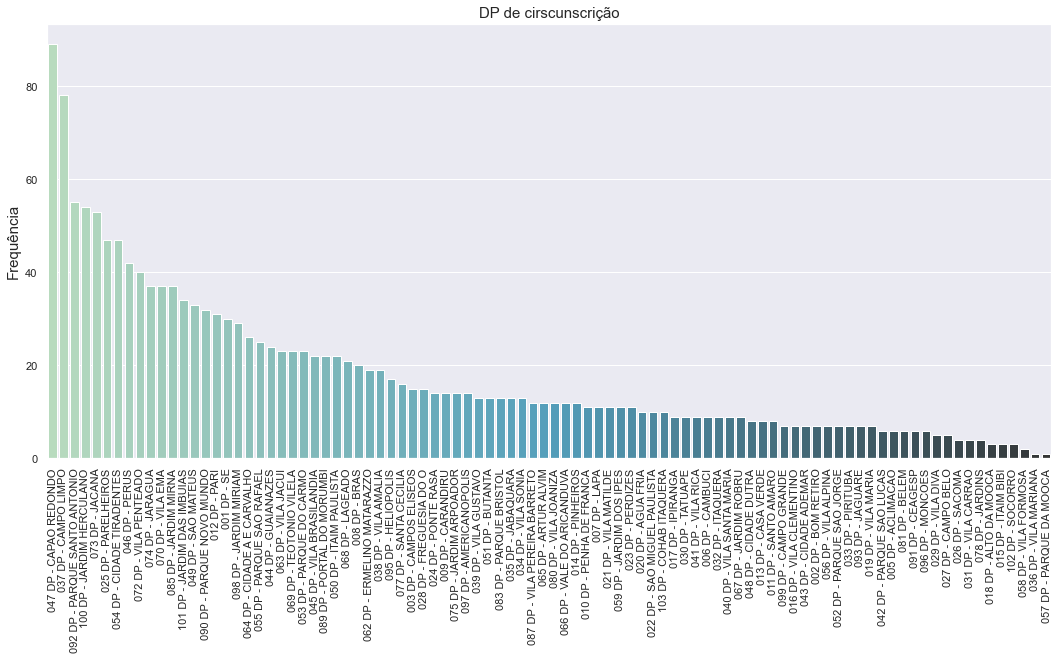

In [235]:
import re
from unidecode import unidecode

def renameDP(row):

    list = row.DP_CIRCUNSCRICAO.split(' ')
    finalName = list
    if '-' in list:
        finalName = row.DP_CIRCUNSCRICAO
    else:
        number = str(re.sub('\D', '', list[0])).zfill(3)

        finalName = f'{number} DP - {" ".join(list[2:])}'

    return unidecode(finalName.upper())

dictDps= {'001 DP - SE': '001 DP - SE',
'002 DP - BOM RETIRO': '002 DP - BOM RETIRO',
'003 DP - CAMPOS ELISEOS': '003 DP - CAMPOS ELISEOS',
'003 DP - CAMPOS ELISIOS': '003 DP - CAMPOS ELISEOS',
'004 DP - CONSOLACAO': '004 DP - CONSOLACAO',
'005 DP - ACLIMACAO': '005 DP - ACLIMACAO',
'006 DP - CAMBUCI': '006 DP - CAMBUCI',
'007 DP - LAPA': '007 DP - LAPA',
'008 DP - BRAS': '008 DP - BRAS',
'009 DP - CARANDIRU': '009 DP - CARANDIRU',
'010 DP - PENHA DE FRANCA': '010 DP - PENHA DE FRANCA',
'011 DP - SANTO AMARO': '011 DP - SANTO AMARO',
'012 DP - PARI': '012 DP - PARI',
'013 DP - CASA VERDE': '013 DP - CASA VERDE',
'014 DP - PINHEIROS': '014 DP - PINHEIROS',
'015 DP - DR LUCIANO H BEIGUELMAN': '015 DP - ITAIM BIBI',
'015 DP - DR. LUC. H BEIGUELMAN': '015 DP - ITAIM BIBI',
'015 DP - ITAIM BIBI': '015 DP - ITAIM BIBI',
'016 DP - VILA CLEMENTINO': '016 DP - VILA CLEMENTINO',
'017 DP - DOUTOR ALDO GALIANO': '017 DP - IPIRANGA',
'017 DP - IPIRANGA': '017 DP - IPIRANGA',
'018 DP - ALTO DA MOOCA': '018 DP - ALTO DA MOOCA',
'019 DP - VILA MARIA': '019 DP - VILA MARIA',
'020 DP - AGUA FRIA': '020 DP - AGUA FRIA',
'021 DP - VILA MATILDE': '021 DP - VILA MATILDE',
'022 DP - SAO MIGUEL PAULISTA': '022 DP - SAO MIGUEL PAULISTA',
'022 DP - SAO MIGUEL PTA': '022 DP - SAO MIGUEL PAULISTA',
'023 DP - PERDIZES': '023 DP - PERDIZES',
'024 DP - PONTE RASA': '024 DP - PONTE RASA',
'025 DP - PARELHEIROS': '025 DP - PARELHEIROS',
'026 DP - SACOMA': '026 DP - SACOMA',
'027 DP - "DR. IGNACIO FRANCISCO"': '027 DP - CAMPO BELO',
'027 DP - CAMPO BELO': '027 DP - CAMPO BELO',
'028 DP - FREGUESIA DO O': '028 DP - FREGUESIA DO O',
'029 DP - VILA DIVA': '029 DP - VILA DIVA',
'029 DP - VILA PRUDENTE': '029 DP - VILA DIVA',
'030 DP - TATUAPE': '030 DP - TATUAPE',
'031 DP - VILA CARRAO': '031 DP - VILA CARRAO',
'032 DP - ITAQUERA': '032 DP - ITAQUERA',
'033 DP - PIRITUBA': '033 DP - PIRITUBA',
'034 DP - MORUMBI': '034 DP - VILA SONIA',
'034 DP - VILA SONIA': '034 DP - VILA SONIA',
'035 DP - JABAQUARA': '035 DP - JABAQUARA',
'036 DP - VILA MARIANA': '036 DP - VILA MARIANA',
'037 DP - CAMPO LIMPO': '037 DP - CAMPO LIMPO',
'038 DP - VILA AMALIA': '038 DP - VILA AMALIA',
'039 DP - VILA GUSTAVO': '039 DP - VILA GUSTAVO',
'040 DP - VILA SANTA MARIA': '040 DP - VILA SANTA MARIA',
'040 DP - VILA STA MARIA': '040 DP - VILA SANTA MARIA',
'041 DP - VILA RICA': '041 DP - VILA RICA',
'042 DP - PARQUE S. LUCAS': '042 DP - PARQUE SAO LUCAS',
'042 DP - PARQUE SAO LUCAS': '042 DP - PARQUE SAO LUCAS',
'043 DP - CIDADE ADEMAR': '043 DP - CIDADE ADEMAR',
'044 DP - GUAIANAZES': '044 DP - GUAIANAZES',
'045 DP - V BRASILANDIA': '045 DP - VILA BRASILANDIA',
'045 DP - VILA BRASILANDIA': '045 DP - VILA BRASILANDIA',
'046 DP - PERUS': '046 DP - PERUS',
'047 DP - CAPAO REDONDO': '047 DP - CAPAO REDONDO',
'048 DP - CIDADE DUTRA': '048 DP - CIDADE DUTRA',
'049 DP - SAO MATEUS': '049 DP - SAO MATEUS',
'050 DP - ITAIM PAULISTA': '050 DP - ITAIM PAULISTA',
'051 DP - BUTANTA': '051 DP - BUTANTA',
'051 DP - RIO PEQUENO': '051 DP - BUTANTA',
'052 DP - PARQUE S.JORGE': '052 DP - PARQUE SAO JORGE',
'052 DP - PARQUE SAO JORGE': '052 DP - PARQUE SAO JORGE',
'053 DP - PARQUE DO CARMO': '053 DP - PARQUE DO CARMO',
'054 DP - CID. TIRADENTES': '054 DP - CIDADE TIRADENTES',
'054 DP - CIDADE TIRADENTES': '054 DP - CIDADE TIRADENTES',
'055 DP - PARQUE S.RAFAEL': '055 DP - PARQUE SAO RAFAEL',
'055 DP - PARQUE SAO RAFAEL': '055 DP - PARQUE SAO RAFAEL',
'056 DP - VILA ALPINA': '056 DP - VILA ALPINA',
'057 DP - PARQUE DA MOOCA': '057 DP - PARQUE DA MOOCA',
'058 DP - VILA FORMOSA': '058 DP - VILA FORMOSA',
'059 DP - JARDIM DOS IPES': '059 DP - JARDIM DOS IPES',
'059 DP - JARDIM NOEMIA': '059 DP - JARDIM DOS IPES',
'062 DP - ERMELINO MATARAZZO': '062 DP - ERMELINO MATARAZZO',
'063 DP - VILA JACUI': '063 DP - VILA JACUI',
'064 DP - CID.AE CARVALHO': '064 DP - CIDADE A E CARVALHO',
'064 DP - CIDADE A E CARVALHO': '064 DP - CIDADE A E CARVALHO',
'065 DP - ARTUR ALVIM': '065 DP - ARTUR ALVIM',
'066 DP - JDIM ARICANDUVA': '066 DP - VALE DO ARICANDUVA',
'066 DP - VALE DO ARICANDUVA': '066 DP - VALE DO ARICANDUVA',
'067 DP - JARDIM ROBRU': '067 DP - JARDIM ROBRU',
'068 DP - LAGEADO': '068 DP - LAGEADO',
'068 DP - LAJEADO': '068 DP - LAGEADO',
'069 DP - TEOTONIO VILELA': '069 DP - TEOTONIO VILELA',
'070 DP - VILA EMA': '070 DP - VILA EMA',
'072 DP - VILA PENTEADO': '072 DP - VILA PENTEADO',
'073 DP - JACANA': '073 DP - JACANA',
'074 DP - JARAGUA': '074 DP - JARAGUA',
'074 DP - PARADA TAIPAS': '074 DP - JARAGUA',
'075 DP - JARDIM ARPOADOR': '075 DP - JARDIM ARPOADOR',
'077 DP - SANTA CECILIA': '077 DP - SANTA CECILIA',
'078 DP - JARDINS': '078 DP - JARDINS',
'080 DP - VILA JOANIZA': '080 DP - VILA JOANIZA',
'081 DP - BELEM': '081 DP - BELEM',
'083 DP - PARQUE BRISTOL': '083 DP - PARQUE BRISTOL',
'085 DP - JARDIM MIRNA': '085 DP - JARDIM MIRNA',
'087 DP - V. P. BARRETO': '087 DP - VILA PEREIRA BARRETO',
'087 DP - VILA PEREIRA BARRETO': '087 DP - VILA PEREIRA BARRETO',
'089 DP - JARDIM TABOAO': '089 DP - PORTAL DO MORUMBI',
'089 DP - PORTAL DO MORUMBI': '089 DP - PORTAL DO MORUMBI',
'090 DP - PARQUE NOVO MUNDO': '090 DP - PARQUE NOVO MUNDO',
'090 DP - PQ. NOVO MUNDO': '090 DP - PARQUE NOVO MUNDO',
'091 DP - CEAGESP': '091 DP - CEAGESP',
'091 DP - CEASA': '091 DP - CEAGESP',
'092 DP - PARQUE SANTO ANTONIO': '092 DP - PARQUE SANTO ANTONIO',
'092 DP - PQ. SANTO ANTONIO': '092 DP - PARQUE SANTO ANTONIO',
'093 DP - JAGUARE': '093 DP - JAGUARE',
'095 DP - HELIOPOLIS': '095 DP - HELIOPOLIS',
'096 DP - MONCOES': '096 DP - MONCOES',
'097 DP - AMERICANOPOLIS': '097 DP - AMERICANOPOLIS',
'098 DP - JARDIM MIRIAM': '098 DP - JARDIM MIRIAM',
'099 DP - CAMPO GRANDE': '099 DP - CAMPO GRANDE',
'09o D.P. - CARANDIRU': '009 DP - CARANDIRU',
'100 DP - JARDIM HERCULANO': '100 DP - JARDIM HERCULANO',
'100 DP - JDIM HERCULANO': '100 DP - JARDIM HERCULANO',
'101 DP - JARDIM DAS IMBUIAS': '101 DP - JARDIM DAS IMBUIAS',
'101 DP - JDIM IMBUIAS': '101 DP - JARDIM DAS IMBUIAS',
'102 DP - SOCORRO': '102 DP - SOCORRO',
'103 DP - COHAB ITAQUERA': '103 DP - COHAB ITAQUERA',
'103 DP - COHABII/ITAQU.': '103 DP - COHAB ITAQUERA'}


dfClean['Fixed DP Circ'] = dfClean.apply(renameDP,axis=1).map(dictDps)
dfClean['Fixed DP Circ']


dp_counts = dfClean['Fixed DP Circ'].value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(dp_counts.keys())
y = list(dp_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("DP de cirscunscrição", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

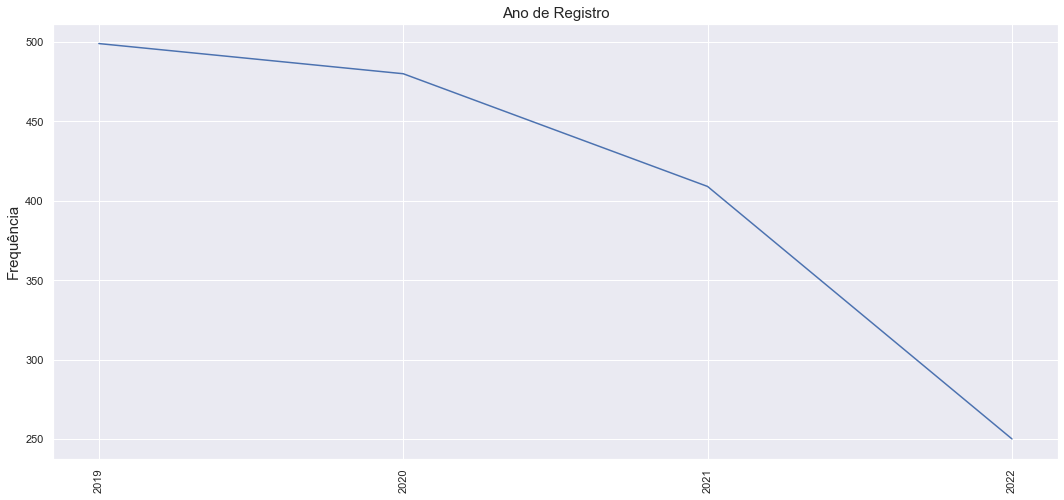

In [240]:
year_counts = dfClean['ANO_BO'].value_counts().sort_index()

sns.set(rc={'figure.figsize':(18,8)})

x = list(year_counts.keys())
y = list(year_counts.values)
sns.lineplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Ano de Registro", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

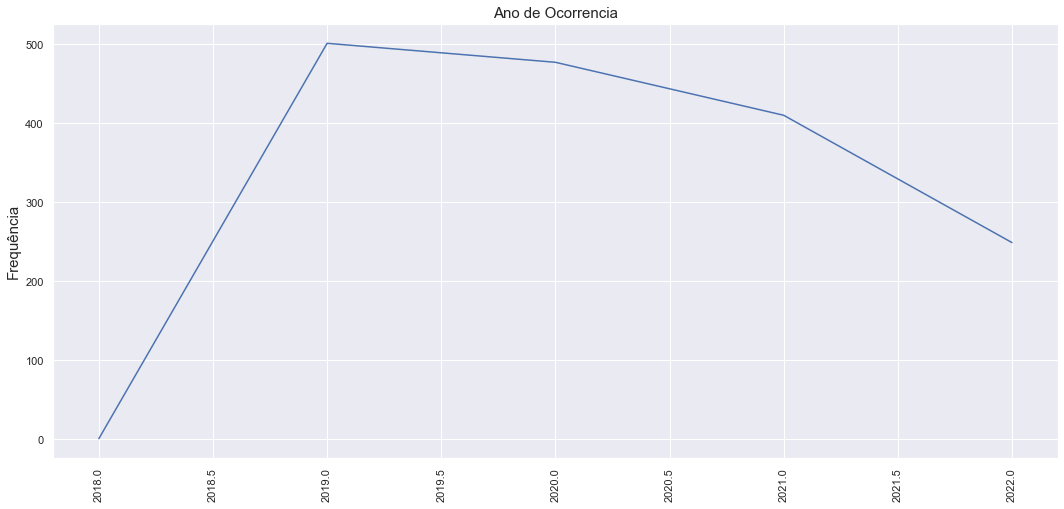

In [241]:
year_counts = dfClean['ANO_FATO'].value_counts().sort_index()

sns.set(rc={'figure.figsize':(18,8)})

x = list(year_counts.keys())
y = list(year_counts.values)
sns.lineplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Ano de Ocorrencia", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

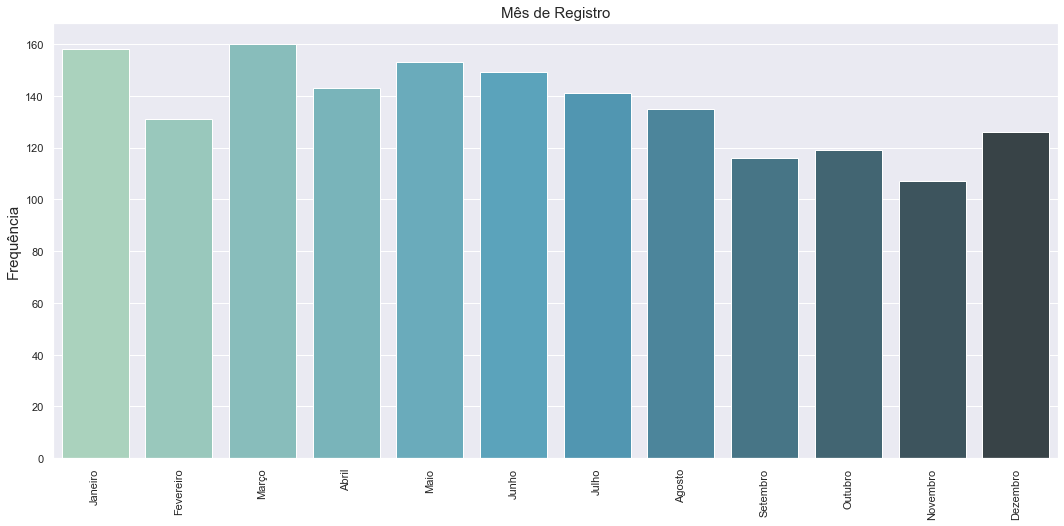

In [238]:
dictMonthsOfYear = {'1': 'Janeiro',
                    '2': 'Fevereiro',
                    '3': 'Março',
                    '4': 'Abril',
                    '5': 'Maio',
                    '6': 'Junho',
                    '7': 'Julho',
                    '8': 'Agosto',
                    '9': 'Setembro',
                    '10': 'Outubro',
                    '11': 'Novembro',
                    '12': 'Dezembro'}
    
month_counts = dfClean['MES_BO'].value_counts().sort_index()

sns.set(rc={'figure.figsize':(18,8)})

x = list(month_counts.keys().astype(str).map(dictMonthsOfYear))
y = list(month_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Mês de Registro", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

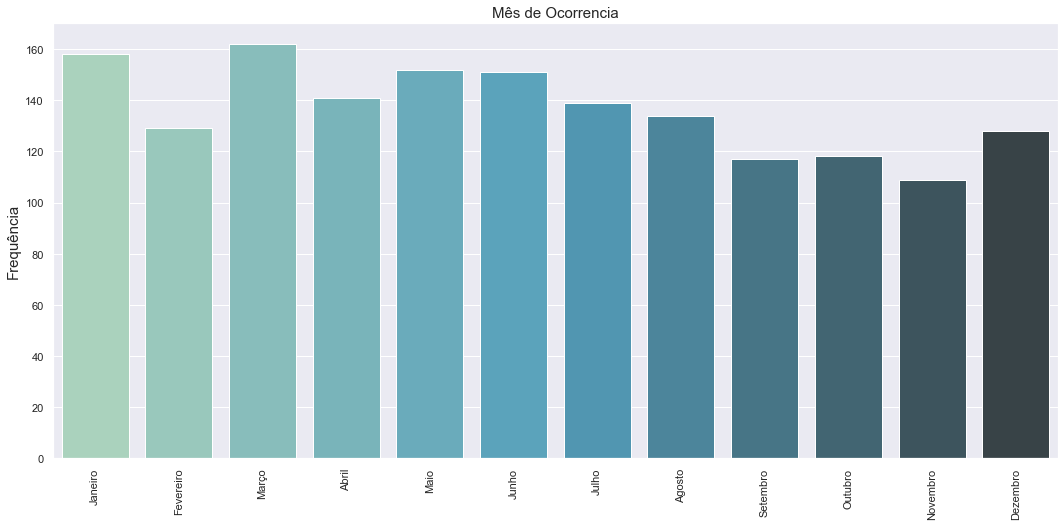

In [239]:
dictMonthsOfYear = {'1': 'Janeiro',
                    '2': 'Fevereiro',
                    '3': 'Março',
                    '4': 'Abril',
                    '5': 'Maio',
                    '6': 'Junho',
                    '7': 'Julho',
                    '8': 'Agosto',
                    '9': 'Setembro',
                    '10': 'Outubro',
                    '11': 'Novembro',
                    '12': 'Dezembro'}

month_counts = dfClean['MES_FATO'].value_counts().sort_index()

sns.set(rc={'figure.figsize':(18,8)})

x = list(month_counts.keys().astype(str).map(dictMonthsOfYear))
y = list(month_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Mês de Ocorrencia", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

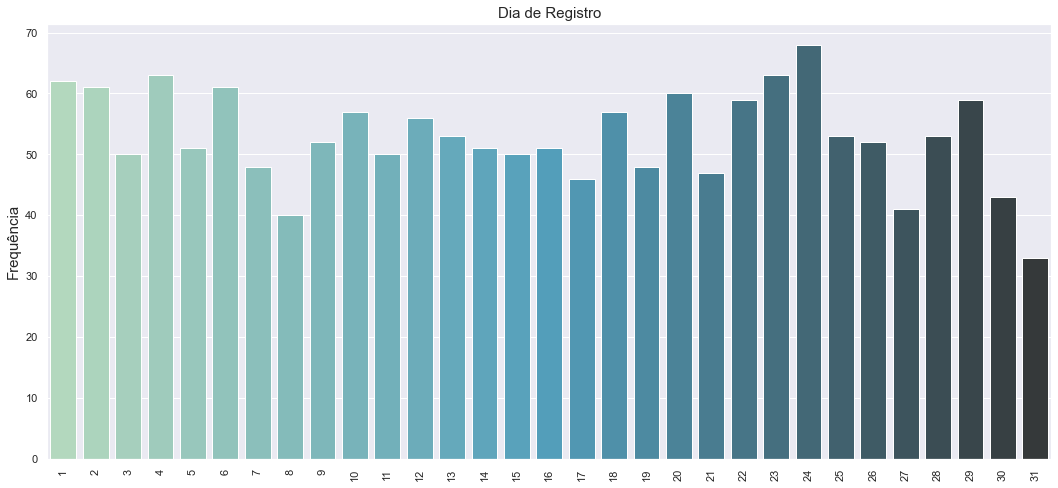

In [190]:
day_counts = dfClean['DIA_BO'].value_counts().sort_index()

sns.set(rc={'figure.figsize':(18,8)})

x = list(day_counts.keys())
y = list(day_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Dia de Registro", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

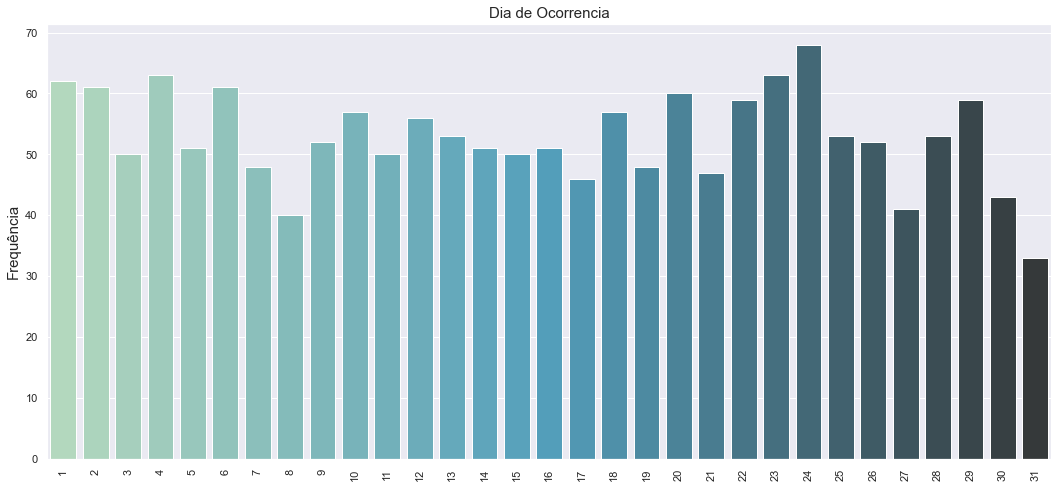

In [191]:
day_counts = dfClean['DIA_BO'].value_counts().sort_index()

sns.set(rc={'figure.figsize':(18,8)})

x = list(day_counts.keys())
y = list(day_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Dia de Ocorrencia", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

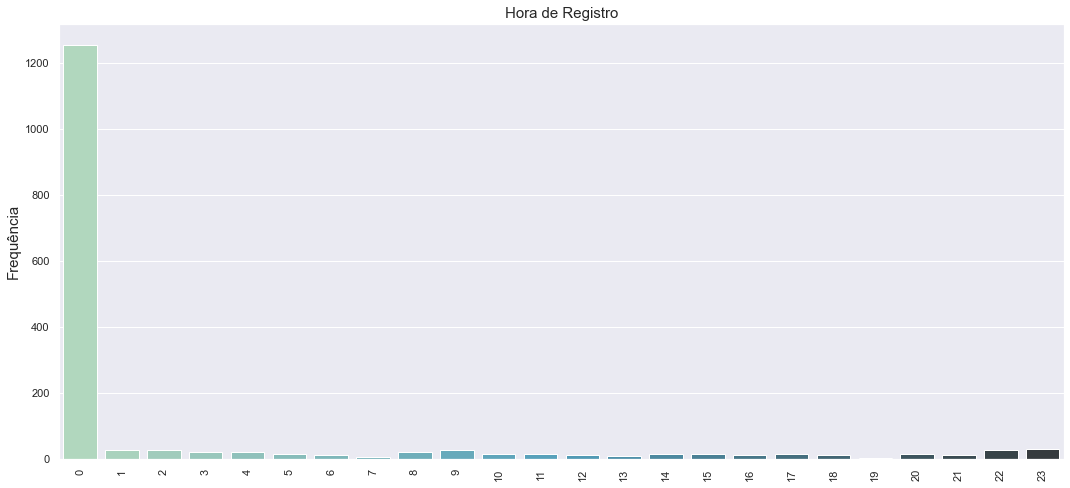

In [192]:
hour_counts = dfClean['HORA_BO'].value_counts().sort_index()

sns.set(rc={'figure.figsize':(18,8)})

x = list(hour_counts.keys())
y = list(hour_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Hora de Registro", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

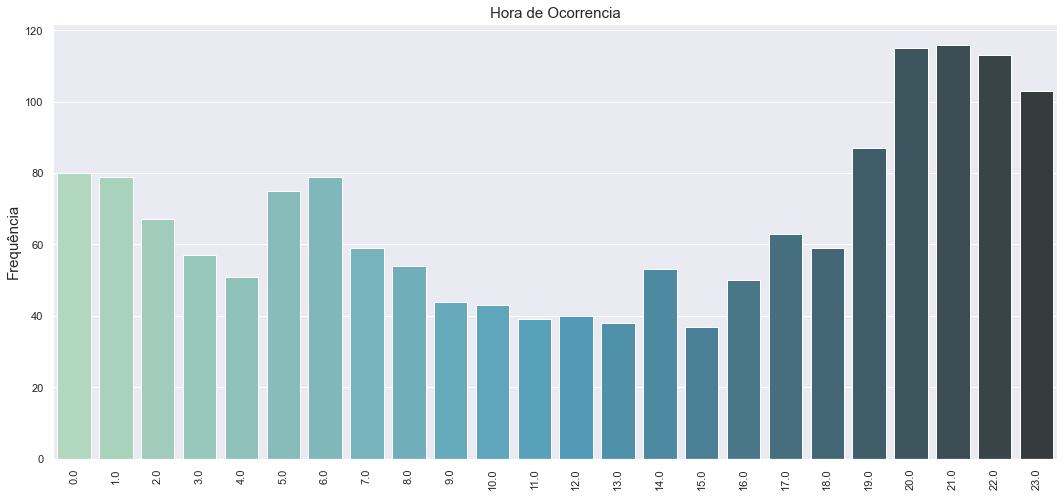

In [214]:
hour_counts = dfClean['HORA_FATO_DT'].value_counts().sort_index()

sns.set(rc={'figure.figsize':(18,8)})

x = list(hour_counts.keys())
y = list(hour_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Hora de Ocorrencia", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

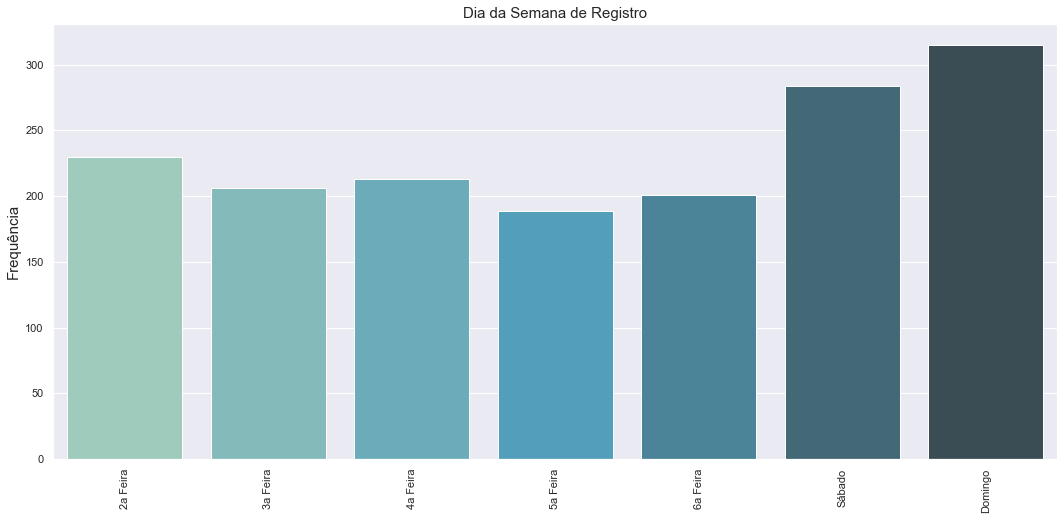

In [194]:
dictWeekdays = {'0':'2a Feira',
                '1':'3a Feira',
                '2':'4a Feira',
                '3':'5a Feira',
                '4':'6a Feira',
                '5':'Sábado',
                '6':'Domingo'}

weekday_counts = dfClean['DIA_SEMANA_BO'].value_counts().sort_index()

sns.set(rc={'figure.figsize':(18,8)})

x = list(weekday_counts.keys().astype(str).map(dictWeekdays))
y = list(weekday_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Dia da Semana de Registro", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

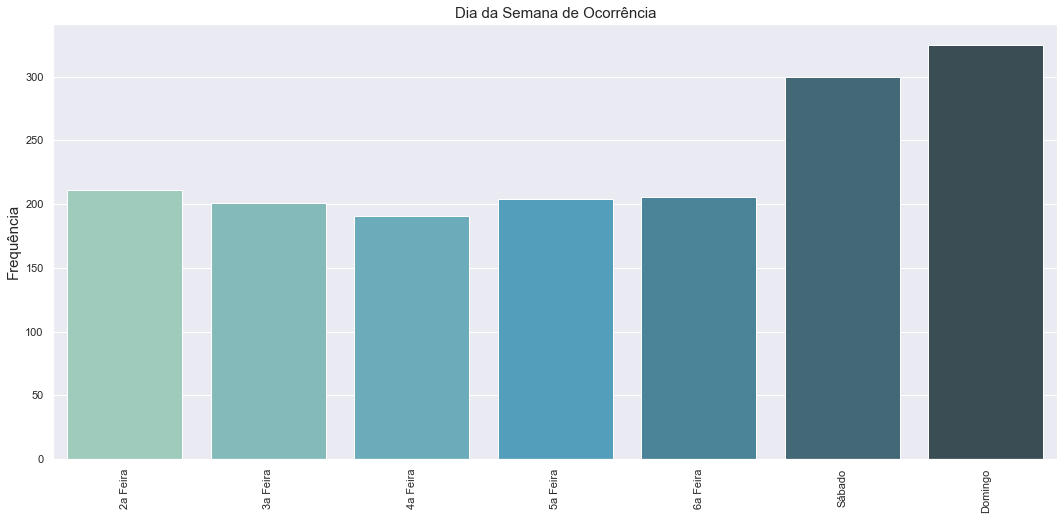

In [195]:
dictWeekdays = {'0':'2a Feira',
                '1':'3a Feira',
                '2':'4a Feira',
                '3':'5a Feira',
                '4':'6a Feira',
                '5':'Sábado',
                '6':'Domingo'}

weekday_counts = dfClean['DIA_SEMANA_FATO'].value_counts().sort_index()#.astype().map(dictWeekdays)

sns.set(rc={'figure.figsize':(18,8)})

x = list(weekday_counts.keys().astype(str).map(dictWeekdays))
y = list(weekday_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Dia da Semana de Ocorrência", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

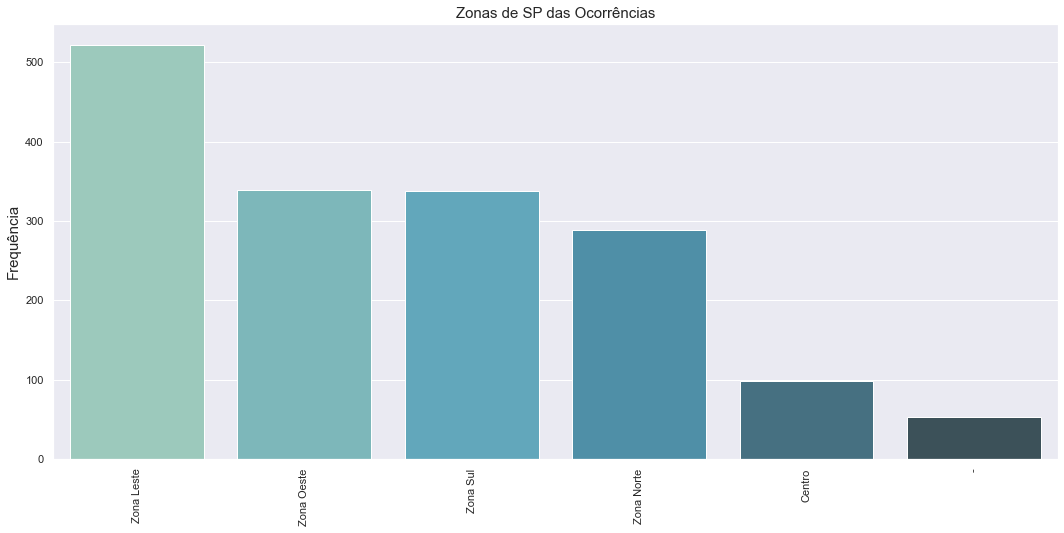

In [ ]:
zone_counts = dfClean['ZONE_FROM_POSTCODE'].value_counts()#.sort_index()#.astype().map(dictWeekdays)

sns.set(rc={'figure.figsize':(18,8)})

x = list(zone_counts.keys())
y = list(zone_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Zonas de SP das Ocorrências", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

IDADE_PESSOA


/var/folders/7t/z5pm4kzs2633wr81yfqjlcj80000gn/T/ipykernel_41738/413147744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean_AgeHist['IDADE_PESSOA'] = dfClean_AgeHist['IDADE_PESSOA'].astype(float).astype(int)


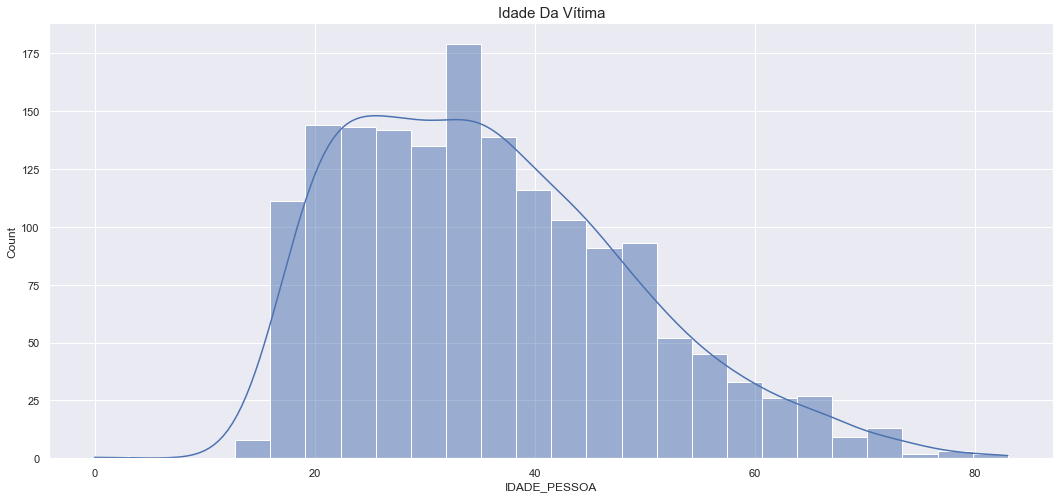

In [199]:
print('IDADE_PESSOA')

dfClean_AgeHist = dfClean[dfClean['IDADE_PESSOA']!='NÃO INFORMADO']
dfClean_AgeHist['IDADE_PESSOA'] = dfClean_AgeHist['IDADE_PESSOA'].astype(float).astype(int)

sns.histplot(data=dfClean_AgeHist, x="IDADE_PESSOA", kde=True)

plt.title("Idade Da Vítima", fontdict = {'fontsize': 15})
plt.show()

In [242]:
dfClean.columns

Index(['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO',
       'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO', 'ID_DELEGACIA',
       'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO', 'MUNICIPIO_ELABORACAO',
       'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 'DATA_FATO',
       'HORA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO',
       'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA',
       'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'NATUREZA_APURADA', 'CRIME',
       'HORA_FATO_DT', 'MES_BO', 'DIA_BO', 'HORA_BO', 'DIA_SEMANA_BO',
       'ANO_FATO', 'MES_FATO', 'DIA_FATO', 'DIA_SEMANA_FATO', 'LAT_LONG',
       'RESPONSE_GEOLOCATOR', 'GEOLOCATOR_ADDRESS', 'GEOLOCATOR_NEIGHBORHOOD',
       'GEOLOCATOR_POSTCODE', 'ZONE_FROM_POSTCODE', 'BO_ANO',
       'NUM_VITIMAS_CRIME', 'Fixed DP Circ'],
      dtype='object')

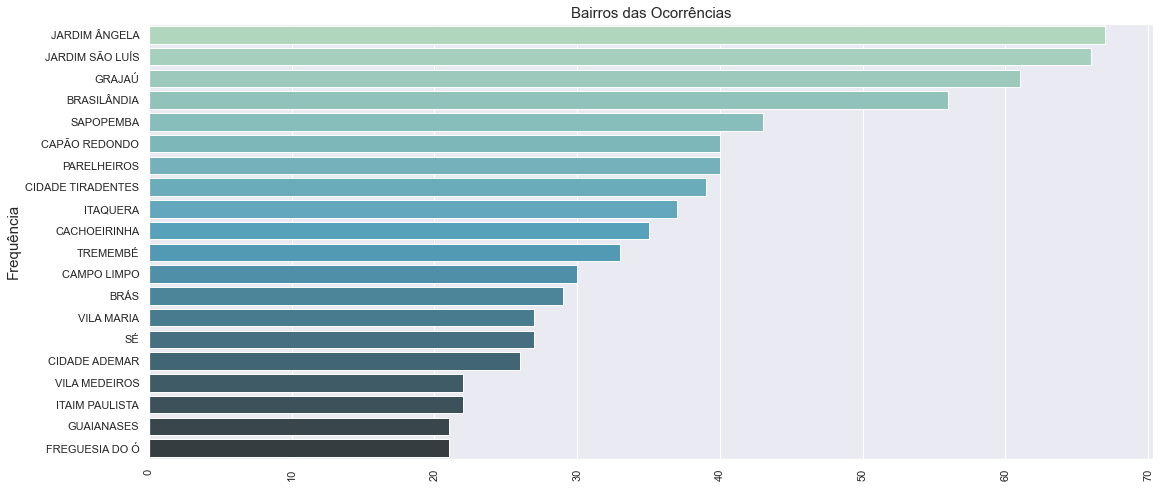

In [249]:
dfClean2 = dfClean[dfClean['GEOLOCATOR_NEIGHBORHOOD']!='-']
neighborhood_counts = dfClean2['GEOLOCATOR_NEIGHBORHOOD'].value_counts().head(20)

sns.set(rc={'figure.figsize':(18,8)})

x = list(neighborhood_counts.keys())
y = list(neighborhood_counts.values)
sns.barplot(x=y, y=x, palette="GnBu_d")

plt.xticks(rotation=90)
plt.title("Bairros das Ocorrências (Top 20)", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()